In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

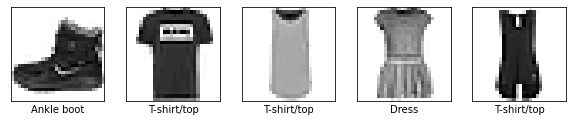

In [31]:
plt.figure(figsize=(10, 10))
for i in range(0, 5):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i]])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [41]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [38]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
y_train[1]

0

In [15]:
len(x_train), len(x_test)

(60000, 10000)

In [17]:
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
              3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt',
              7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [18]:
x_train.shape

(60000, 28, 28)

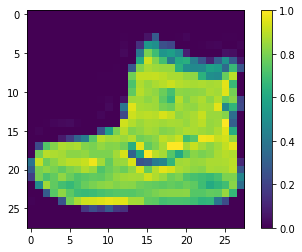

In [19]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
def build_model():
    model = Sequential(name='MNIST_Model')
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
model = build_model()

In [45]:
model.summary()

Model: "MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               

In [46]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4228 - accuracy: 0.8454 - val_loss: 0.3378 - val_accuracy: 0.8797
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2800 - accuracy: 0.8977 - val_loss: 0.2929 - val_accuracy: 0.8905
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2328 - accuracy: 0.9136 - val_loss: 0.2652 - val_accuracy: 0.9026
Epoch 4/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1976 - accuracy: 0.9253 - val_loss: 0.2608 - val_accuracy: 0.9098
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1682 - accuracy: 0.9374 - val_loss: 0.2476 - val_accuracy: 0.9107


In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2476 - accuracy: 0.9107


[0.24760399758815765, 0.9107000231742859]

In [83]:
def show_wrong_predict(test_model, features, labels, indexes):
    plt.figure(figsize=(20, 20))
    for index in indexes:
        prediction = np.argmax(test_model.predict(features[index].reshape(1, 28, 28, 1)))
        result = np.argmax(labels[index])
        plt.subplot(5, 5, indexes.index(index)+1)
        plt.axis('off')
        plt.title(f'True label: {class_names[result]}\nModel prediction: {class_names[prediction]}')
        plt.imshow(features[index])
        if indexes.index(index) > 20:
            break
    plt.show()

In [49]:
np.argmax(y_test[0])

9

In [52]:
test_lst = []
for i in range(len(x_test)):
    pred = np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1)))
    if np.argmax(y_test[i]) != pred:
        test_lst.append(i)
    if i % 500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [64]:
print(test_lst)

[17, 21, 23, 25, 42, 44, 49, 66, 67, 68, 73, 74, 89, 98, 107, 147, 150, 153, 217, 239, 244, 248, 266, 285, 286, 312, 316, 324, 325, 339, 352, 378, 379, 381, 382, 396, 404, 437, 441, 444, 454, 459, 460, 474, 495, 510, 547, 565, 628, 634, 639, 659, 661, 664, 669, 670, 674, 681, 685, 689, 699, 711, 713, 722, 724, 732, 736, 738, 753, 760, 787, 801, 851, 881, 890, 902, 905, 909, 921, 930, 938, 956, 960, 963, 965, 966, 976, 977, 979, 1000, 1005, 1029, 1046, 1051, 1056, 1058, 1066, 1104, 1107, 1111, 1131, 1142, 1152, 1160, 1162, 1165, 1174, 1191, 1194, 1197, 1224, 1231, 1235, 1254, 1280, 1285, 1286, 1297, 1300, 1305, 1306, 1312, 1322, 1326, 1329, 1336, 1356, 1374, 1388, 1396, 1408, 1425, 1449, 1462, 1469, 1471, 1487, 1496, 1501, 1509, 1533, 1559, 1617, 1626, 1629, 1632, 1643, 1645, 1650, 1665, 1671, 1679, 1684, 1701, 1706, 1712, 1732, 1739, 1743, 1744, 1763, 1771, 1777, 1810, 1814, 1836, 1846, 1856, 1867, 1900, 1917, 1922, 1942, 1943, 1953, 1954, 1955, 1964, 1968, 1980, 2001, 2006, 2009, 2022

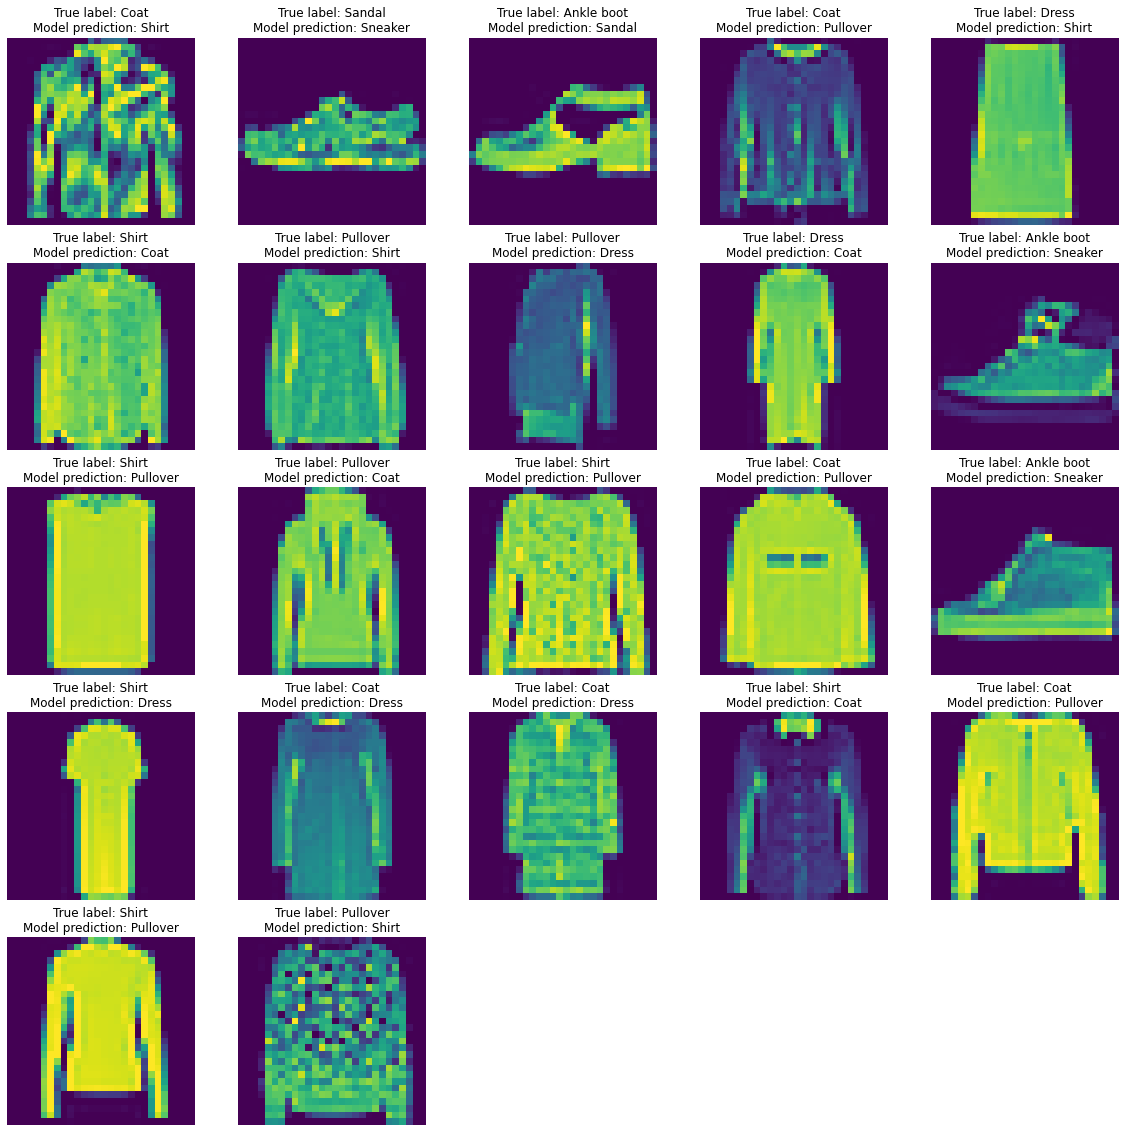

In [84]:
show_wrong_predict(model, x_test, y_test, test_lst)